<a href="https://colab.research.google.com/github/Emyfoton/Codigos_pregrado/blob/main/Bit%C3%A1cora_masa_carga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
R4 = Quantity(4, 'cm')
R6 = Quantity(6, 'cm')
R8 = Quantity(8, 'cm')
R10 = Quantity(10, 'cm')

V_R4 = Quantity([113, 125, 127, 174, 272], 'V')
I_R4 = Quantity([22.7, 24.6, 24.9, 31, 39.9], 'mA')

V_R6 = Quantity([213, 229, 241, 273, 312], 'V')
I_R6 = Quantity([21.5, 22.6, 23.6, 25.2, 26.9], 'mA')

V_R8 = Quantity([208 ,254, 265, 293, 350], 'V')
I_R8 = Quantity([15.9, 18, 18.6, 19.6, 21.5], 'mA')

V_R10 = Quantity([152, 196, 252, 273, 322], 'V')
I_R10 = Quantity([9.8, 12, 14.3, 15, 16.4], 'mA')

In [ ]:
R = Quantity(0.2, 'm')
N = Quantity(154)
mu0 = Quantity(4*np.pi*10**(-7), 'T*m/A')
X = Quantity(12, 'cm')
X = X.to('m')
I_R4 = I_R4.to('A')


B_IR4 = (mu0*R**(2)*N*I_R4)/((R**2 + X**2)**(3/2))
B_IR6 = (mu0*R**(2)*N*I_R6)/((R**2 + X**2)**(3/2))
B_IR8 = (mu0*R**(2)*N*I_R8)/((R**2 + X**2)**(3/2))
B_IR10 = (mu0*R**(2)*N*I_R10)/((R**2 + X**2)**(3/2))

In [ ]:
R4 = R4.to('m')
R6 = R6.to('m')
R8 = R8.to('m')
R10 = R10.to('m')

em_R4 = (2*V_R4)/(B_IR4*R4)**2
em_R6 = (2*V_R6)/(B_IR6*R6)**2
em_R8 = (2*V_R8)/(B_IR8*R8)**2
em_R10 = (2*V_R10)/(B_IR10*R10)**2

em_R4 = em_R4.to('C/kg')
em_R6 = em_R6.to('C/kg')
em_R8 = em_R8.to('C/kg')
em_R10 = em_R10.to('C/kg')

EM_R4 = np.mean(em_R4)
EM_R6 = np.mean(em_R6)
EM_R8 = np.mean(em_R8)
EM_R10 = np.mean(em_R10)

<Quantity(659982966601212.5, 'coulomb / kilogram')>

Magnitude,[3.068712132194542e-13 3.603915919033648e-13 3.6923522852800127e-13 5.723053734865715e-13 9.48091443958748e-13]
Units,meter2 tesla2


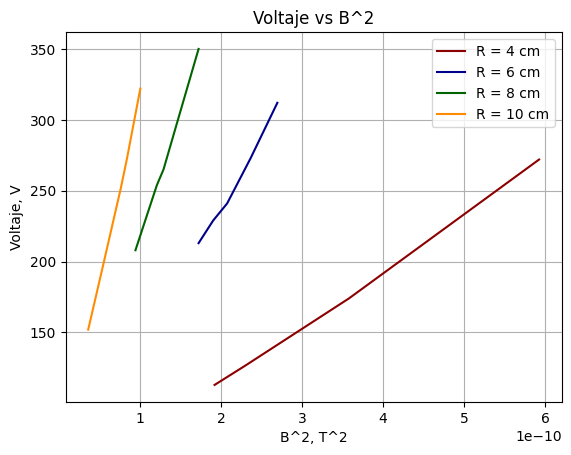

In [106]:
plt.plot(B_IR4**2, V_R4, c = 'darkred', label = 'R = 4 cm')
plt.plot(B_IR6**2, V_R6, c = 'darkblue', label = 'R = 6 cm')
plt.plot(B_IR8**2, V_R8, c = 'darkgreen', label = 'R = 8 cm')
plt.plot(B_IR10**2, V_R10, c = 'darkorange', label = 'R = 10 cm')



plt.xlabel('B^2, T^2')
plt.ylabel('Voltaje, V')
plt.title('Voltaje vs B^2')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
!pip install lmfit #Instalar lmfit si no lo tienes
from lmfit import Model
# Define la función de ajuste
def ajuste(x, m, b):
    return m * x + b
# Crea un modelo de lmfit
model = Model(ajuste)
# Ajusta el modelo a los datos


In [ ]:
resultR4 = model.fit(V_R4.m, x=B_IR4.m**2, m=100000, b=4)
resultR6 = model.fit(V_R6.m, x=B_IR6.m**2, m=100000, b=4)
resultR8 = model.fit(V_R8.m, x=B_IR8.m**2, m=100000, b=4)
resultR10 = model.fit(V_R10.m, x=B_IR10.m**2, m=100000, b=4)
# Imprime los resultados del ajuste
print(resultR4.fit_report()), print(resultR6.fit_report()), print(resultR8.fit_report()), print(resultR10.fit_report())

[[Model]]
    Model(ajuste)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 5
    # variables        = 2
    chi-square         = 15.5236600
    reduced chi-square = 5.17455334
    Akaike info crit   = 9.66463701
    Bayesian info crit = 8.88351283
    R-squared          = 0.99909949
[[Variables]]
    m:  3.9735e+11 +/- 6.8874e+09 (1.73%) (init = 100000)
    b:  35.2010695 +/- 2.42499866 (6.89%) (init = 4)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9078
[[Model]]
    Model(ajuste)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 5
    # variables        = 2
    chi-square         = 48.0618489
    reduced chi-square = 16.0206163
    Akaike info crit   = 15.3152539
    Bayesian info crit = 14.5341298
    R-squared          = 0.99224709
[[Variables]]
    m:  1.0183e+12 +/- 5.1969e+10 (5.10%) (init = 100000)
    b:  34.6283301 +/- 11.3175109 (32.68%)

(None, None, None, None)

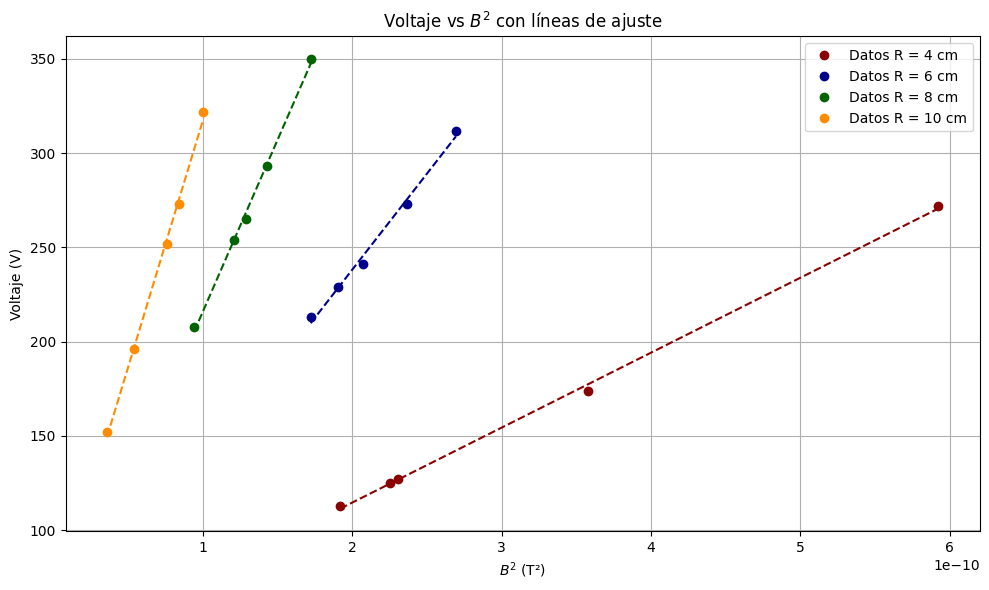

In [98]:
ajustes = {
    'R4': {'m': 3.9735e11, 'b': 35.2010695, 'color': 'darkred'},
    'R6': {'m': 1.0183e12, 'b': 34.6283301, 'color': 'darkblue'},
    'R8': {'m': 1.8208e12, 'b': 34.2015269, 'color': 'darkgreen'},
    'R10': {'m': 2.6140e12, 'b': 56.3818762, 'color': 'darkorange'}
}

plt.figure(figsize=(10,6))

def g_ajuste(B2, V, key):
    color = ajustes[key]['color']
    m = ajustes[key]['m']
    b = ajustes[key]['b']

    plt.plot(B2, V, 'o', color=color, label=f'Datos R = {key[1:]} cm')
    B2_vals = np.linspace(min(B2.magnitude), max(B2.magnitude), 100)
    V_fit = m * B2_vals + b
    plt.plot(B2_vals, V_fit, '--', color=color)

g_ajuste((B_IR4**2).to('T**2'), V_R4.to('V'), 'R4')
g_ajuste((B_IR6**2).to('T**2'), V_R6.to('V'), 'R6')
g_ajuste((B_IR8**2).to('T**2'), V_R8.to('V'), 'R8')
g_ajuste((B_IR10**2).to('T**2'), V_R10.to('V'), 'R10')

plt.xlabel(r'$B^2$ (T²)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje vs B^2')plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [107]:
import pandas as pd

data= {
    "miliamperios": [12.3, 15.3, 19.4, 21.7, 23.1, 25, 27.4, 29.8, 33.2, 34.5, 36.4, 38.4, 40, 40.6],
    "miliTeslas": [1, 1.3, 1.6,1.8, 2, 2.2, 2.3, 2.4, 2.7, 2.8, 3, 3.1, 3.3, 3.4]
}

df= pd.DataFrame(data)
print(df)

    miliamperios  miliTeslas
0           12.3         1.0
1           15.3         1.3
2           19.4         1.6
3           21.7         1.8
4           23.1         2.0
5           25.0         2.2
6           27.4         2.3
7           29.8         2.4
8           33.2         2.7
9           34.5         2.8
10          36.4         3.0
11          38.4         3.1
12          40.0         3.3
13          40.6         3.4


[0.08073068 0.06013191] [[ 3.04911812e-06 -8.64860476e-05]
 [-8.64860476e-05  2.69420223e-03]]


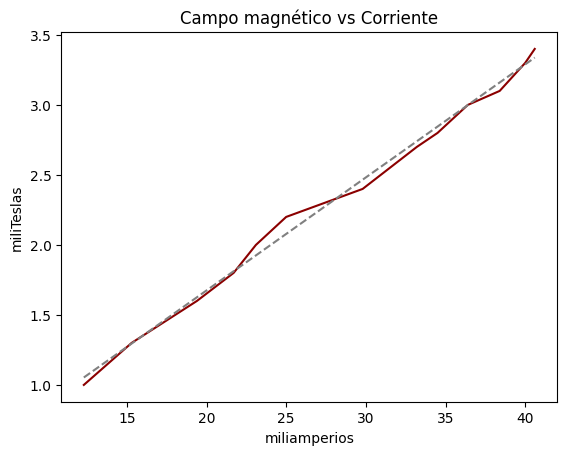

In [108]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

mA= np.array(df["miliamperios"])
mT= np.array(df["miliTeslas"])


def ajuste (x, a, b):
  return a*x + b


popt, pcov= curve_fit(ajuste, mA, mT)
print(popt, pcov)

plt.plot(mA, mT, c="darkred")
plt.plot(mA, ajuste(mA, *popt), "--", c= "grey")
plt.title("Campo magnético vs Corriente")
plt.ylabel("miliTeslas")
plt.xlabel("miliamperios")
plt.show()
